# Real State Data Exploratory Analysis 

In [86]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [87]:
# Basics for Data Analysis 
import numpy as np
import pandas as pd
# Basics for Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

og_set = original data set

In [88]:
og_set = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data_sets/Melbourne_Housing.csv")

##  Data Sanity Check

Basic knowlege of the data frame 
1. head()
2. shape
3. info()
4. describe()

In [89]:
og_set.head() # also can use tail()

,Suburb,Rooms,Type,SellerG,Date,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Regionname,Propertycount,Price
0,Airport West,3,t,Nelson,03-09-2016,13.5,3042.0,3.0,2.0,1.0,303.0,225,2016.0,Western Metropolitan,3464,840000
1,Albert Park,2,h,hockingstuart,03-09-2016,3.3,3206.0,2.0,1.0,0.0,120.0,82,1900.0,Southern Metropolitan,3280,1275000
2,Albert Park,2,h,Thomson,03-09-2016,3.3,3206.0,2.0,1.0,0.0,159.0,inf,NaN,Southern Metropolitan,3280,1455000
3,Alphington,4,h,Brace,03-09-2016,6.4,3078.0,3.0,2.0,4.0,853.0,263,1930.0,Northern Metropolitan,2211,2000000
4,Alphington,3,h,Jellis,03-09-2016,6.4,3078.0,3.0,2.0,2.0,208.0,inf,2013.0,Northern Metropolitan,2211,1110000


In [90]:
og_set.shape

(27114, 16)

In [91]:
og_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27114 entries, 0 to 27113
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         27114 non-null  object 
 1   Rooms          27114 non-null  int64  
 2   Type           27114 non-null  object 
 3   SellerG        27114 non-null  object 
 4   Date           27114 non-null  object 
 5   Distance       27113 non-null  float64
 6   Postcode       27113 non-null  float64
 7   Bedroom        20678 non-null  float64
 8   Bathroom       20672 non-null  float64
 9   Car            20297 non-null  float64
 10  Landsize       17873 non-null  float64
 11  BuildingArea   10543 non-null  object 
 12  YearBuilt      11985 non-null  float64
 13  Regionname     27114 non-null  object 
 14  Propertycount  27114 non-null  int64  
 15  Price          27114 non-null  int64  
dtypes: float64(7), int64(3), object(6)
memory usage: 3.3+ MB


In [92]:
og_set.describe()

,Rooms,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,YearBuilt,Propertycount,Price
count,27114.000000,27113.000000,27113.000000,20678.000000,20672.000000,20297.000000,17873.000000,11985.000000,27114.000000,2.711400e+04
mean,2.992218,11.278737,3113.782687,3.046184,1.591525,1.715820,560.536564,1966.618273,7564.205245,1.050564e+06
std,0.954722,6.783544,111.114271,0.955024,0.701106,0.994487,1411.309127,36.042000,4493.596054,6.415785e+05
min,1.000000,0.000000,3000.000000,0.000000,0.000000,0.000000,50.000000,1850.000000,83.000000,8.500000e+04
25%,2.000000,6.400000,3046.000000,2.000000,1.000000,1.000000,220.000000,1950.000000,4294.000000,6.350000e+05
50%,3.000000,10.500000,3088.000000,3.000000,1.000000,2.000000,513.000000,1970.000000,6567.000000,8.710000e+05
75%,4.000000,14.000000,3153.000000,4.000000,2.000000,2.000000,664.000000,2000.000000,10412.000000,1.300000e+06
max,16.000000,48.100000,3978.000000,20.000000,9.000000,18.000000,76000.000000,2019.000000,21650.000000,1.120000e+07


In [93]:
# Building area should be a numeric type of value but it is as a string(object) 
type("BuildingArea")

str

In [94]:
# And if we have a date in a data set as an string(object) it is recommended to change it to a real date format 
type("Date")

str

In [95]:
og_set["Date"] = pd.to_datetime(og_set["Date"])

In [96]:
og_set.info() # now date is in datatime64 dtype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27114 entries, 0 to 27113
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Suburb         27114 non-null  object        
 1   Rooms          27114 non-null  int64         
 2   Type           27114 non-null  object        
 3   SellerG        27114 non-null  object        
 4   Date           27114 non-null  datetime64[ns]
 5   Distance       27113 non-null  float64       
 6   Postcode       27113 non-null  float64       
 7   Bedroom        20678 non-null  float64       
 8   Bathroom       20672 non-null  float64       
 9   Car            20297 non-null  float64       
 10  Landsize       17873 non-null  float64       
 11  BuildingArea   10543 non-null  object        
 12  YearBuilt      11985 non-null  float64       
 13  Regionname     27114 non-null  object        
 14  Propertycount  27114 non-null  int64         
 15  Price          2711

In [97]:
og_set["BuildingArea"].unique()

array(['225', '82', 'inf', '263', '242', '251', '117', 'missing', '76',
       '399', '118', '103', '180', '123', '218', '129', '167', '154',
       '275', '121', nan, '125', '255', '75', '156', '240', '268', '108',
       '69', '140', '214', '253', '189', '215', '96', '104', '100', '313',
       '144', '93', '110', '70', '122', '51', '147', '113', '83', '56',
       '137', '85', '64', '175', '3558', '170', '265', '353', '138', '19',
       '116', '87', '74', '320', '300', '210', '120', '86', '97', '200',
       '106', '14', '161', '128', '185', '146', '133', '115', '143',
       '150', '195', '236', '276', '188', '179', '249', '141', '34', '73',
       '107', '84', '81', '207', '50', '264', '312', '235', '221', '183',
       '132', '160', '186', '78', '105', '145', '62', '220', '315', '181',
       '61', '112', '420', '226', '266', '410', '449', '356', '477',
       '250', '95', '190', '284', '247', '213', '209', '119', '111',
       '130', '348', '166', '44', '176', '98', '159', '79'

In [98]:
# there are some strings into this particular column that change the whole dtype 
# with a quick scan you can say its "inf" and "missing"
# so what we will try to do is to change those strings into something py understands (nan)

In [99]:
# check how many are strings and how many are actually numeric values 
og_set["BuildingArea"].apply(type).value_counts()

<class 'float'>    16571
<class 'str'>      10543
Name: BuildingArea, dtype: int64

In [100]:
# using numpy replace we will change the strings inf and missing with not a number
og_set["BuildingArea"] = og_set["BuildingArea"].replace(["inf", "missing"], np.nan)
# there is other way to do oit throught importing again the data set and adding at the end
# "link to the dataset", na_values = ["missing", "inf"] 

In [101]:
# now to be able to work properly with ease we will make every entry of the column a float 
og_set["BuildingArea"] = og_set["BuildingArea"].astype(float)

In [102]:
og_set["BuildingArea"].apply(type).value_counts()

<class 'float'>    27114
Name: BuildingArea, dtype: int64

In [103]:
# to know how many nan are
og_set.isnull().sum()

Suburb               0
Rooms                0
Type                 0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom           6436
Bathroom          6442
Car               6817
Landsize          9241
BuildingArea     16585
YearBuilt        15129
Regionname           0
Propertycount        0
Price                0
dtype: int64

In [104]:
# as you can see distance to yearbuildt 
#8 columns 

In [105]:
# to know if theres dupliates 
og_set.duplicated().sum()

11

In [106]:
# lets remove those duplicates 
og_set.drop_duplicates(inplace=True)
# this last line of code ruins the index so lets fix the index 
og_set.reset_index(drop=True, inplace=True)

In [107]:
# now we dont have duplicates
og_set.duplicated().sum()

0

In [108]:
og_set.describe().T

,count,mean,std,min,25%,50%,75%,max
Rooms,27103.0,2.992473e+00,0.954667,1.0,2.0,3.0,4.0,16.0
Distance,27102.0,1.127993e+01,6.783958,0.0,6.4,10.5,14.0,48.1
Postcode,27102.0,3.113787e+03,111.129025,3000.0,3046.0,3088.0,3153.0,3978.0
Bedroom,20678.0,3.046184e+00,0.955024,0.0,2.0,3.0,4.0,20.0
Bathroom,20672.0,1.591525e+00,0.701106,0.0,1.0,1.0,2.0,9.0
Car,20297.0,1.715820e+00,0.994487,0.0,1.0,2.0,2.0,18.0
Landsize,17873.0,5.605366e+02,1411.309127,50.0,220.0,513.0,664.0,76000.0
BuildingArea,10529.0,1.545119e+02,130.583872,11.0,101.0,133.0,183.0,6791.0
YearBuilt,11985.0,1.966618e+03,36.042000,1850.0,1950.0,1970.0,2000.0,2019.0
Propertycount,27103.0,7.564741e+03,4494.028347,83.0,4294.0,6567.0,10412.0,21650.0


In [109]:
#postcode it apears a number even though we know it should be more a string so lets see 
# the total number of unique values in the postcode column 
og_set["Postcode"].nunique() 
# unique gives you all 
# nunique the number of unique values

209

In [110]:
# lets see the number of categorical variables 
# this is a really useful code
categorical_columns = ["Suburb", "Type", "SellerG", "Regionname"]
for i in categorical_columns:
    print(og_set[i].value_counts())
    print("-" * 50)

Reservoir         724
Bentleigh East    493
Richmond          437
Preston           410
Brunswick         383
                 ... 
Wandin North        1
Ferny Creek         1
Tecoma              1
Montrose            1
viewbank            1
Name: Suburb, Length: 345, dtype: int64
--------------------------------------------------
h    18394
u     5882
t     2827
Name: Type, dtype: int64
--------------------------------------------------
Nelson           2733
Jellis           2516
Barry            2385
hockingstuart    2096
Ray              1574
                 ... 
Allan               1
Jim                 1
iProperty           1
Batty               1
Icon                1
Name: SellerG, Length: 347, dtype: int64
--------------------------------------------------
Southern Metropolitan         8480
Northern Metropolitan         7809
Western Metropolitan          5792
Eastern Metropolitan          3264
South-Eastern Metropolitan    1336
Northern Victoria              165
Eastern Victor

In [111]:
# lets see it but in percentage 
for i in categorical_columns:
    print(og_set[i].value_counts(normalize = True))
    print("-" * 50)

Reservoir         0.026713
Bentleigh East    0.018190
Richmond          0.016124
Preston           0.015127
Brunswick         0.014131
                    ...   
Wandin North      0.000037
Ferny Creek       0.000037
Tecoma            0.000037
Montrose          0.000037
viewbank          0.000037
Name: Suburb, Length: 345, dtype: float64
--------------------------------------------------
h    0.678670
u    0.217024
t    0.104306
Name: Type, dtype: float64
--------------------------------------------------
Nelson           0.100838
Jellis           0.092831
Barry            0.087998
hockingstuart    0.077335
Ray              0.058075
                   ...   
Allan            0.000037
Jim              0.000037
iProperty        0.000037
Batty            0.000037
Icon             0.000037
Name: SellerG, Length: 347, dtype: float64
--------------------------------------------------
Southern Metropolitan         0.312880
Northern Metropolitan         0.288123
Western Metropolitan          0.

### Analysis post sanity check of the data set 


### **Preliminary** Results

*   The ds had some issues with strings making a whole column an object dtype so I changed that, remove any kind of string and replacing them with nan 
*   The date was not in datetime64 dtype so it had to be done manually 
*   There are probably outliers because some of the max values in the columns rooms, bedrooms, bathroom and cars
*  Reservoir is the suburn with more entrys, h the type of house more common, Nelson the guy with more sells and the southern metropolitan is the region with more houses in this particular dataset









## Univariate Analysis 

### Distance

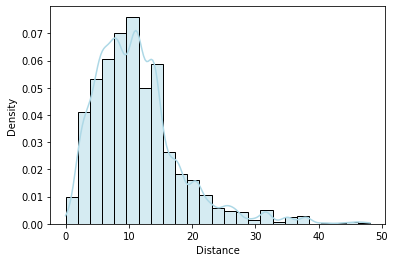

In [112]:
sns.histplot(data = og_set, x = "Distance", stat = "density", bins = 25, kde = True, color = "lightblue");

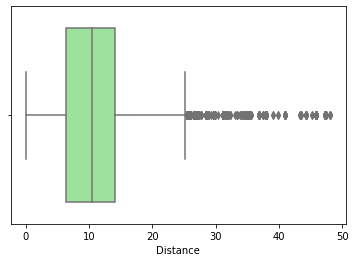

In [113]:
sns.boxplot(data = og_set, x = "Distance", color = "lightgreen");
# a lot of outliers 


*   Skewed towards right 
*   Many outliers 
*   If distance is gretear than 25 km is an outlier



In [114]:
# how many outliers are 
og_set.loc[og_set["Distance"]>25].shape
# a lot

(1206, 16)

### Landsize

It is in sqmeters so to make it easear I will divide them by a million sqmeters so that will give me a sqkilometer scale

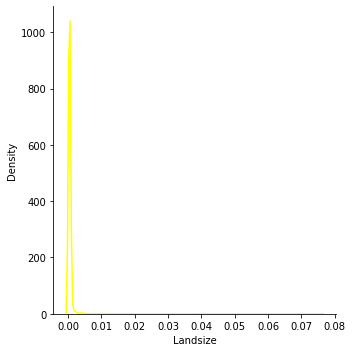

In [115]:
sns.displot(data = og_set, x = og_set["Landsize"]/1000000, kind = "kde", color = "yellow");

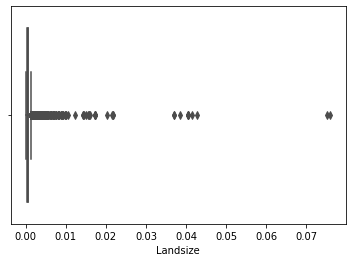

In [116]:
sns.boxplot(data = og_set, x = og_set["Landsize"]/1000000, color = "blue");



*   Highly skewed to right 
*   Many outliers 



In [117]:
# To see wich rows have a ls greater than 0.01 skm
og_set.loc[og_set["Landsize"]>60000]

,Suburb,Rooms,Type,SellerG,Date,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Regionname,Propertycount,Price
23897,Silvan,3,h,Harcourts,2017-05-27,34.6,3795.0,3.0,2.0,2.0,76000.0,NaN,NaN,Eastern Victoria,457,1085000
25079,Balwyn North,3,h,Kay,2016-08-28,9.2,3104.0,3.0,1.0,2.0,75100.0,NaN,NaN,Southern Metropolitan,7809,2000000


### Building Area

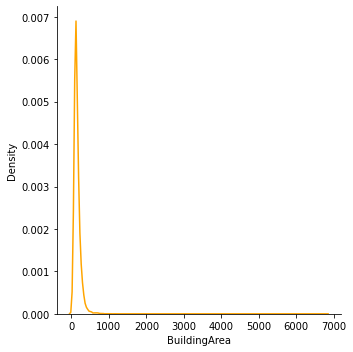

In [118]:
sns.displot(data = og_set, x = og_set["BuildingArea"], kind = "kde", color = "orange");

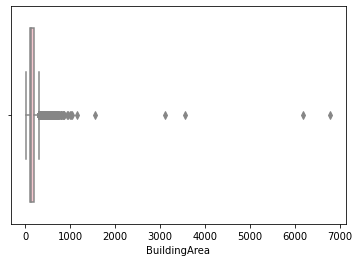

In [119]:
sns.boxplot(data = og_set, x = og_set["BuildingArea"], color = "pink");



*   Also skewed towards right
*   It has many outliers but after 2k there are a few ones that I may have to check out in detail later 



### Price

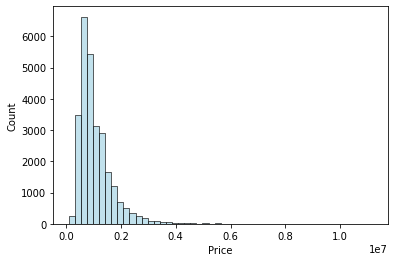

In [120]:
sns.histplot(data = og_set, x = og_set["Price"], bins = 50, color = "lightblue");

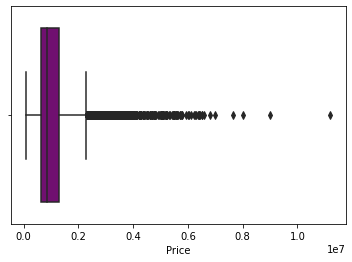

In [121]:
sns.boxplot(data = og_set, x = "Price", color = "purple");



*  Skewed right
*  outliers greater than 7 Million will need more analysis 



### Rooms 

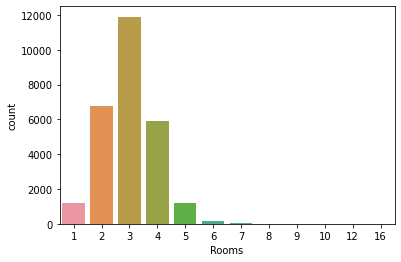

In [122]:
sns.countplot( data = og_set, x ="Rooms");

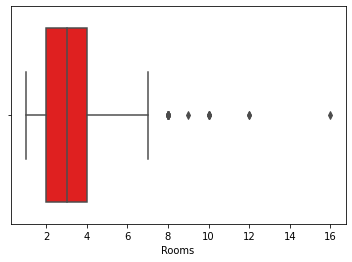

In [123]:
sns.boxplot(data = og_set, x = "Rooms", color = "red");

In [124]:
# how many houses has more than seven rooms 
og_set.loc[og_set["Rooms"]>7].shape

(23, 16)

In [125]:
# what type are the properties 
og_set.loc[og_set["Rooms"]>7, "Type"].value_counts() # if you use normalize = True it will be in %

h    21
u     2
Name: Type, dtype: int64



*  Skewed right but the most normal distibution in the whole data frame
*  Its pretty rare to see a house with more than 7 rooms and for that instance there are not as many outliers as in Distance for example



### Region Name

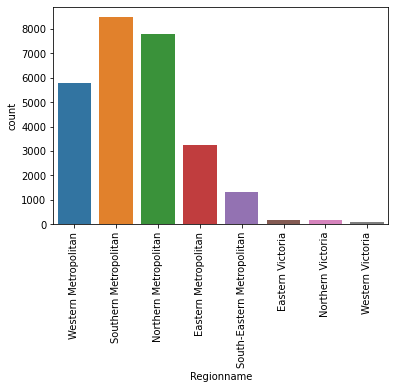

In [126]:
sns.countplot(data = og_set, x = "Regionname" );
plt.xticks(rotation = 90);

## Bivariate Analysis 

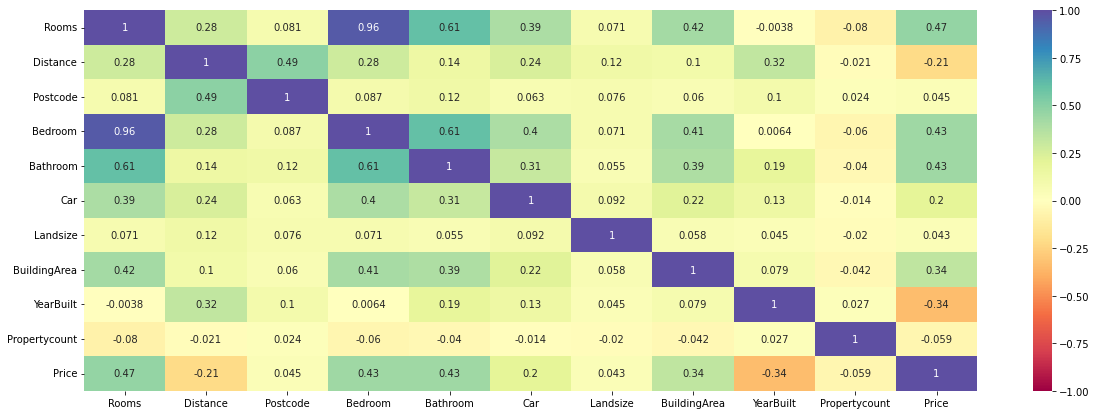

In [127]:
# we will do a heatmap with corr() method to get the cor_matrix
plt.figure(figsize = (20,7))
sns.heatmap(og_set.corr(), annot = True, cmap = "Spectral", vmin = -1, vmax = 1);

In [128]:
# it doesnt have any sense to make any analysis with postcode so any kind of cor with that column will be ignore



*   -0.34 cor between year of built and the price , so older homes usually are more expensive
*   Building area and the price has a 0.34 cor that is very intuitive information as well as the cor in rooms and price that is one of the highest 0.47
* And others with not that useful information such as the cor between bathrooms to bedrooms or rooms of 0.61 



In [129]:
# I will create a new column that will include all the spaces of the house as rooms, bathrooms, bedrooms and car spaces 
# to see the relation between the total spaces with the price
og_set["Total_spaces"] = og_set["Car"] + og_set["Rooms"] + og_set["Bedroom"] + og_set["Bathroom"]
og_set.head() 

,Suburb,Rooms,Type,SellerG,Date,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Regionname,Propertycount,Price,Total_spaces
0,Airport West,3,t,Nelson,2016-03-09,13.5,3042.0,3.0,2.0,1.0,303.0,225.0,2016.0,Western Metropolitan,3464,840000,9.0
1,Albert Park,2,h,hockingstuart,2016-03-09,3.3,3206.0,2.0,1.0,0.0,120.0,82.0,1900.0,Southern Metropolitan,3280,1275000,5.0
2,Albert Park,2,h,Thomson,2016-03-09,3.3,3206.0,2.0,1.0,0.0,159.0,NaN,NaN,Southern Metropolitan,3280,1455000,5.0
3,Alphington,4,h,Brace,2016-03-09,6.4,3078.0,3.0,2.0,4.0,853.0,263.0,1930.0,Northern Metropolitan,2211,2000000,13.0
4,Alphington,3,h,Jellis,2016-03-09,6.4,3078.0,3.0,2.0,2.0,208.0,NaN,2013.0,Northern Metropolitan,2211,1110000,10.0


### Total space and Price

<Figure size 1440x504 with 0 Axes>

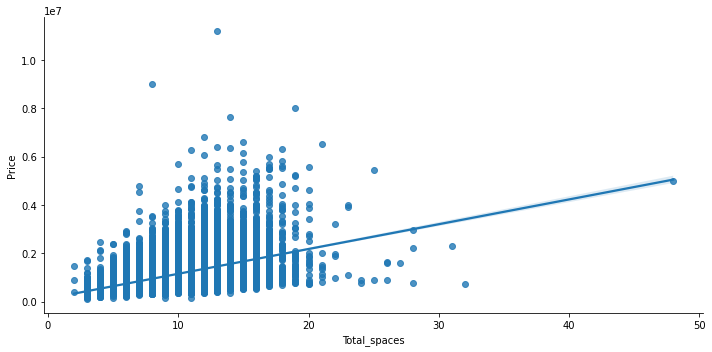

In [130]:
plt.figure(figsize = (20,7));
sns.lmplot(data = og_set, x = "Total_spaces", y = "Price", height = 5, aspect = 2);

There is a relationship that tends to increse the price if a house has more spaces but there is not a robust conclusion. So I will see the correlation between the variables 

In [131]:
og_set[["Total_spaces", "Price"]].corr()

,Total_spaces,Price
Total_spaces,1.000000,0.458282
Price,0.458282,1.000000


Very high correlation but cor is no cau. So it will need further analysis 

### Distance and Price

<Figure size 1440x504 with 0 Axes>

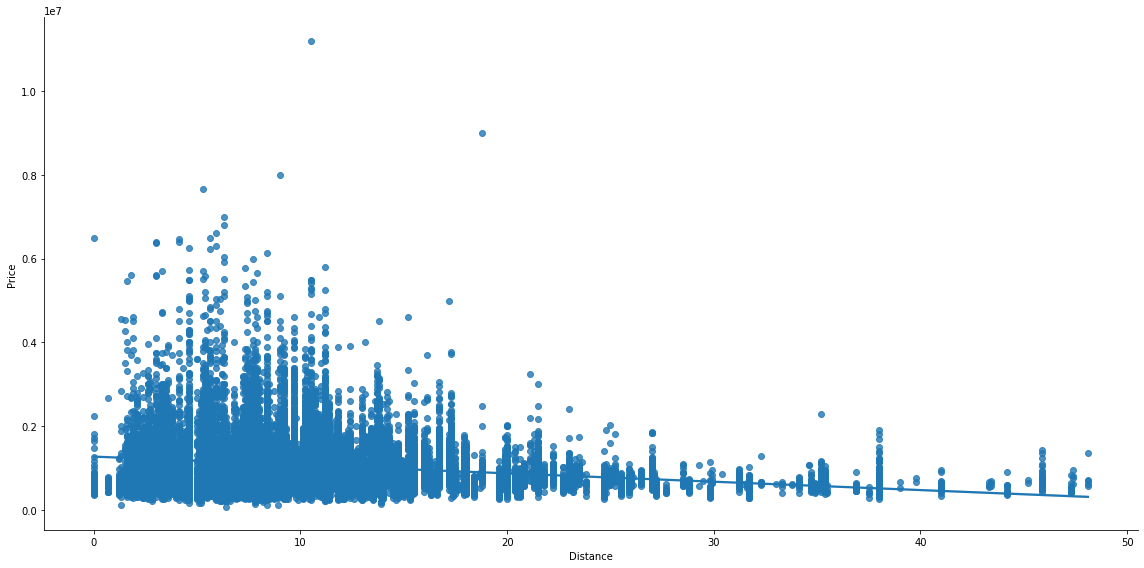

In [132]:
plt.figure(figsize = (20,7));
sns.lmplot(data = og_set, x = "Distance", y = "Price", height = 8, aspect = 2);

In [133]:
og_set[["Distance", "Price"]].corr()

,Distance,Price
Distance,1.000000,-0.211194
Price,-0.211194,1.000000


It has a relatively low negative cor but it indicates that if the distance increases and price generaly will go down

### I will create bins for distance 
0-15km Nearby
15-30km Moderately close 
30-50km Far


In [134]:
og_set["Distance_bins"] = pd.cut(og_set['Distance'],
                                bins = [0,15,30,50],
                                labels = ['Nearby', "Mederately close", "Far"],
                                right = False)
# right = False will make the funtion count the 0 bin 

In [135]:
og_set["Distance_bins"]

0                  Nearby
1                  Nearby
2                  Nearby
3                  Nearby
4                  Nearby
               ...       
27098    Mederately close
27099              Nearby
27100    Mederately close
27101    Mederately close
27102    Mederately close
Name: Distance_bins, Length: 27103, dtype: category
Categories (3, object): ['Nearby' < 'Mederately close' < 'Far']

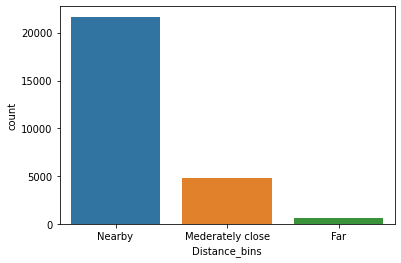

In [136]:
# lets see the distibution with a barplot and a boxplot
sns.countplot(data = og_set,  x = "Distance_bins");

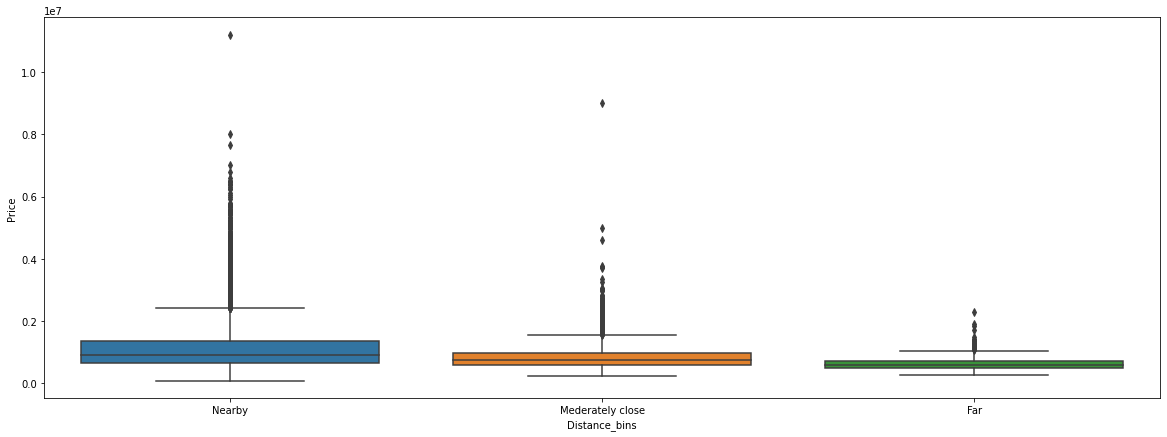

In [137]:
plt.figure(figsize = (20,7));
sns.boxplot(data = og_set , x = "Distance_bins", y = "Price");

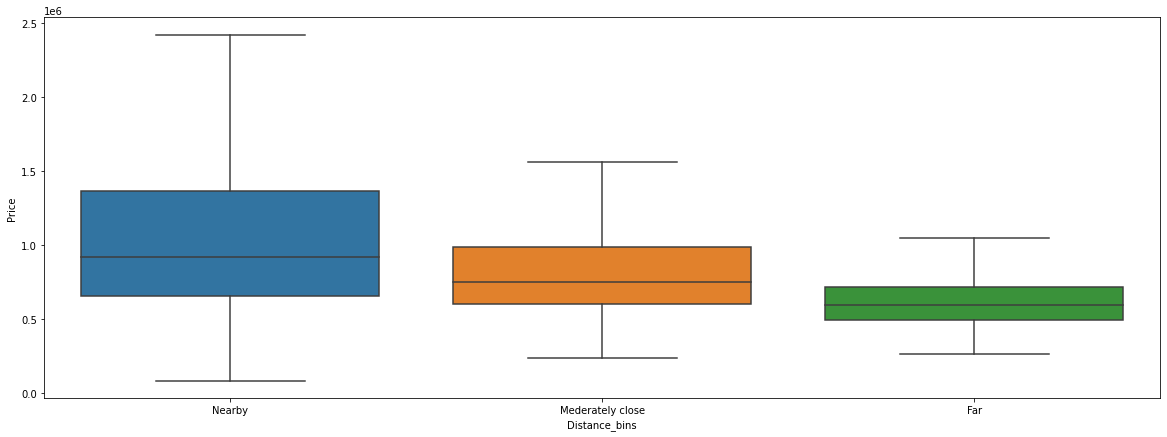

In [138]:
# now I want to see just the box plot without the outliers so same code line but at the end showfliers = False
plt.figure(figsize = (20,7));
sns.boxplot(data = og_set , x = "Distance_bins", y = "Price", showfliers = False);



*   If its far it generaly would be cheaper than the one nearby the center of the city or the CBD
* Nearby houses has a quite high var(x) 




### Year built and Price
But I will get a new variable that will have only the year of the sale and to compare it with the year it was built each house 

In [139]:
Year_Sale = og_set["Date"].dt.year # dt.year  will only include the year of each datetime 
Year_Sale

0        2016
1        2016
2        2016
3        2016
4        2016
         ... 
27098    2017
27099    2017
27100    2017
27101    2017
27102    2017
Name: Date, Length: 27103, dtype: int64

In [140]:
# there are some missing values in Sale_year
# now let see the range between Year Built and Year Sale and call Age_prop
og_set["Age_prop"] = Year_Sale - og_set["YearBuilt"]
og_set.head()

,Suburb,Rooms,Type,SellerG,Date,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Regionname,Propertycount,Price,Total_spaces,Distance_bins,Age_prop
0,Airport West,3,t,Nelson,2016-03-09,13.5,3042.0,3.0,2.0,1.0,303.0,225.0,2016.0,Western Metropolitan,3464,840000,9.0,Nearby,0.0
1,Albert Park,2,h,hockingstuart,2016-03-09,3.3,3206.0,2.0,1.0,0.0,120.0,82.0,1900.0,Southern Metropolitan,3280,1275000,5.0,Nearby,116.0
2,Albert Park,2,h,Thomson,2016-03-09,3.3,3206.0,2.0,1.0,0.0,159.0,NaN,NaN,Southern Metropolitan,3280,1455000,5.0,Nearby,NaN
3,Alphington,4,h,Brace,2016-03-09,6.4,3078.0,3.0,2.0,4.0,853.0,263.0,1930.0,Northern Metropolitan,2211,2000000,13.0,Nearby,86.0
4,Alphington,3,h,Jellis,2016-03-09,6.4,3078.0,3.0,2.0,2.0,208.0,NaN,2013.0,Northern Metropolitan,2211,1110000,10.0,Nearby,3.0


In [141]:
# lets make a quick scan of the unique values of the new column 
og_set["Age_prop"].unique()

array([  0., 116.,  nan,  86.,   3.,   1.,  51.,  46.,  52.,  66.,  36.,
        96.,  31.,  16.,  56.,  42.,  19.,   8.,  76., 111.,  59., 126.,
        81.,  27.,   7.,  61.,  41., 106.,  12.,   6., 136.,   9.,  91.,
        15.,  11., 112.,  21.,  26.,   4.,  23.,  13.,  38.,  18., 127.,
         2.,  -1.,  39.,  10.,   5.,  14.,  97., 101.,  47., 153., 123.,
       104.,  48.,  44.,  17.,  73.,  65.,  94.,  20.,  24.,  58.,  54.,
        49.,  82., 129.,  40.,  71.,  43.,  22.,  33.,  34.,  98.,  30.,
        63.,  88.,  68.,  75.,  67.,  28.,  25.,  92., 119.,  93.,  32.,
        29., 160., 114.,  50.,  55.,  87.,  64., 131.,  78., 146.,  45.,
       113., 110., 148., 109.,  53.,  77.,  89.,  60.,  37., 156., 132.,
        90., 128.,  62.,  57., 117., 107.,  79.,  35., 137.,  80., 102.,
        72.,  95., 103.,  74., 122., 142.,  69., 130., 100., 157., 155.,
       108.,  83., 118., 138., 133., 149.,  70., 147., 162., 124., 141.,
        99.,  85., 154., 115., 167., 121., 105., 12

#### Big problem: 
There are not negative ages, but the column has them. 

Possibilities: 

Data entry mistake 

There was sold before it was built 

My mistake

In [142]:
# With the scan  there are -1 and -2 unique values so lets see those ones 
# But lets get all those ones < 0
og_set[og_set["Age_prop"]<0]

,Suburb,Rooms,Type,SellerG,Date,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Regionname,Propertycount,Price,Total_spaces,Distance_bins,Age_prop
285,Avondale Heights,3,t,Nelson,2016-03-12,10.5,3034.0,3.0,3.0,1.0,557.0,181.0,2017.0,Western Metropolitan,4502,851000,10.0,Nearby,-1.0
13854,Bentleigh,3,h,Woodards,2018-03-17,11.4,3204.0,3.0,1.0,4.0,635.0,242.0,2019.0,Southern Metropolitan,6795,1100000,11.0,Nearby,-1.0
15232,Reservoir,4,h,Barry,2016-09-17,11.2,3073.0,3.0,2.0,2.0,834.0,129.0,2017.0,Northern Metropolitan,21650,767500,11.0,Nearby,-1.0
19463,Keilor East,3,h,Nelson,2016-04-23,12.8,3033.0,3.0,2.0,1.0,630.0,126.0,2017.0,Western Metropolitan,5629,825000,9.0,Nearby,-1.0
21326,Brighton East,2,h,Buxton,2016-09-24,10.7,3187.0,4.0,3.0,2.0,302.0,250.0,2018.0,Southern Metropolitan,6938,1310000,11.0,Nearby,-2.0
24897,Newport,3,h,Jas,2016-05-28,8.4,3015.0,4.0,2.0,1.0,487.0,190.0,2017.0,Western Metropolitan,5498,945000,10.0,Nearby,-1.0
27069,Heidelberg,3,h,Miles,2016-07-30,10.6,3084.0,5.0,3.0,2.0,649.0,357.0,2017.0,Eastern Metropolitan,2890,1030000,13.0,Nearby,-1.0


### Will need more information for this houses and sales 
Contact with the sellers: 
Nelson...
Woodards...
Barry...
Buxton...
Jas...
Miles...


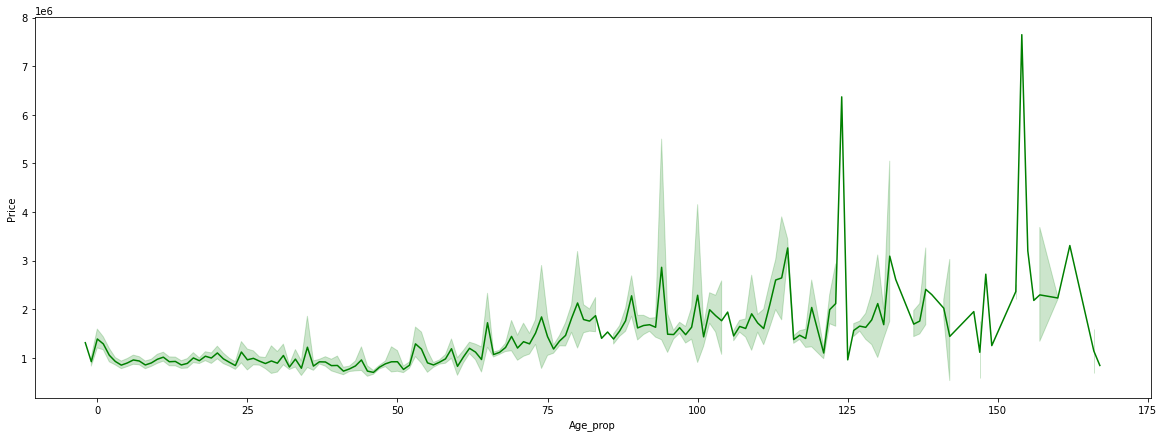

In [143]:
plt.figure(figsize = (20,7))
sns.lineplot(data = og_set, x = "Age_prop", y = "Price", color = "green");

In [144]:
# cor (Age_prop, Price)
og_set[["Age_prop", "Price"]].corr()

,Age_prop,Price
Age_prop,1.000000,0.341085
Price,0.341085,1.000000




*   The correlation is moderately high as the cor between yearbuilt and price but this one is a little bit weaker 0.34

*   The buyers who are into vintage properties will be more likely to spend more money



Lets see if that behaviur is particular of a specific region 

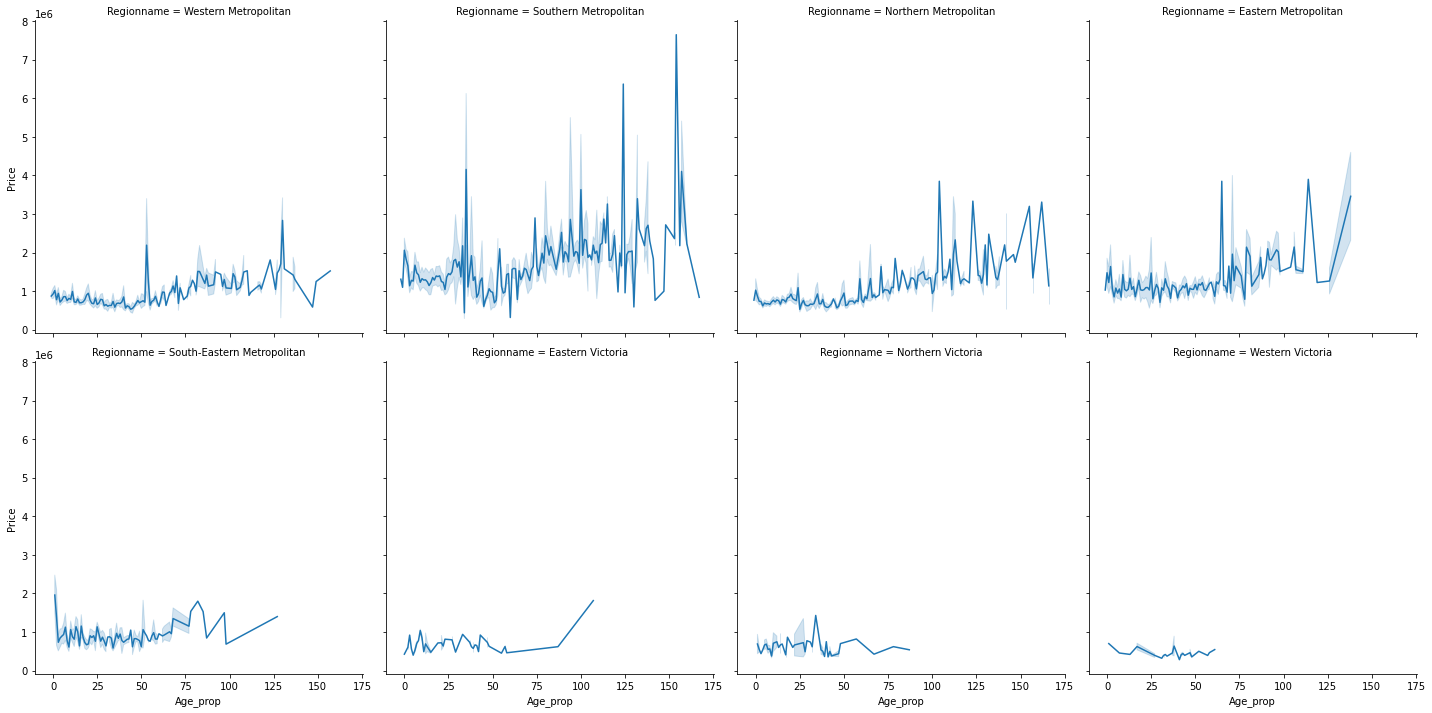

In [145]:
# relplot = line or scatter but it allows you to use the col argument inside 
sns.relplot(data = og_set, x = "Age_prop", y = "Price", col = "Regionname", kind = "line", col_wrap = 4)


Where the cor is higher , the first one been the highest
*   Southern M
*   Norththen M and Eastern M
*   Western M 


So the behaviur is more likely to be the Metropolitan area


### Type and Price

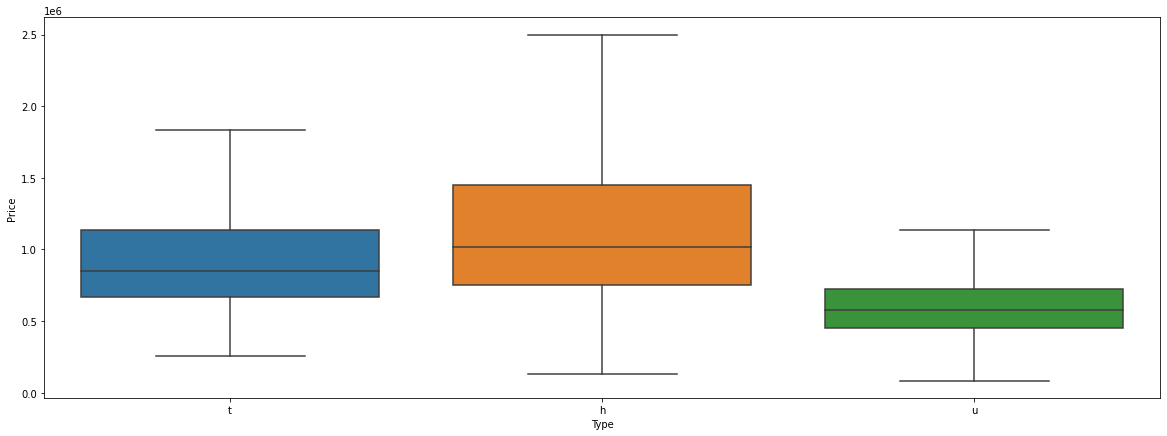

In [146]:
plt.figure(figsize=(20,7))
sns.boxplot(data = og_set, x = "Type", y = "Price", showfliers = False);



*   h has the highest var(x) and the higher prices for the 50% of the data 
*   t pretty average and u beem the one with the smallest var(x) and price range in the 50% of its data



### Region name and Price

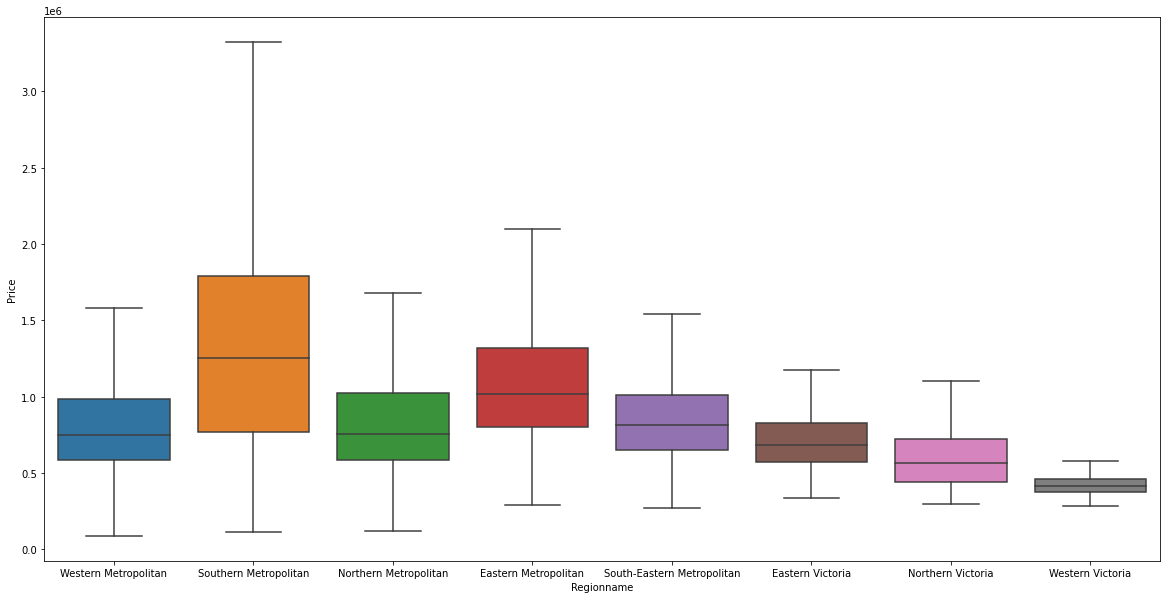

In [147]:
plt.figure(figsize = (20,10))
sns.boxplot(data = og_set, x = "Regionname", y = "Price", showfliers = False); 



*   Southern M biggest var(x) and also has the higher and smaller price
*   Western victoria is not a great place to invest, just if you want the cheapest and maybe the more secure investment

